In [1]:
from importlib import util
tensorflow_found = util.find_spec("tensorflow") is not None
pytorch_found = util.find_spec("torch") is not None
pytorch_ext_found = util.find_spec("intel_extension_for_pytorch") is not None
tensorflow_ext_found = util.find_spec("intel_extension_for_tensorflow") is not None
xgboost_found = util.find_spec("xgboost") is not None
sklearn_found = util.find_spec("sklearn") is not None
sklearnex_found = util.find_spec("sklearnex") is not None
inc_found = util.find_spec("neural_compressor") is not None
modin_found = util.find_spec("modin") is not None
torchccl_found = util.find_spec("oneccl_bindings_for_pytorch") is not None

class arch_checker:

    def __init__(self):
        cpuinfo_found = util.find_spec("cpuinfo") is not None
        if cpuinfo_found == False:
            self.arch = 'None'
            print("please install py-cpuinfo")
            return
        from cpuinfo import get_cpu_info
        info = get_cpu_info()
        flags = info['flags']
        arch_list = ['SPR', 'CPX',"ICX|CLX", "SKX", "BDW|CORE|ATOM"]
        isa_list = [['amx_bf16', 'amx_int8', 'amx_tile'],['avx512_bf16'],['avx512_vnni'],['avx512'],['avx2']]
        index = len(arch_list) - 1
        for flag in flags:
            for idx, isa_sublist in enumerate(isa_list):
                for isa in isa_sublist:
                    if isa in flag:
                        if idx < index:
                            index = idx
        self.arch = arch_list[index]
        return

if tensorflow_found == True:

    import tensorflow as tf

    import os

    def get_mkl_enabled_flag():

        mkl_enabled = False
        major_version = int(tf.__version__.split(".")[0])
        minor_version = int(tf.__version__.split(".")[1])
        if major_version >= 2:
            onednn_enabled = 0
            if minor_version < 5:
                from tensorflow.python import _pywrap_util_port
            else:
                from tensorflow.python.util import _pywrap_util_port
                onednn_enabled = int(os.environ.get('TF_ENABLE_ONEDNN_OPTS', '0'))
            mkl_enabled = _pywrap_util_port.IsMklEnabled() or (onednn_enabled == 1)
        else:
            mkl_enabled = tf.pywrap_tensorflow.IsMklEnabled()
        return mkl_enabled

    print ("TensorTlow version: ", tf.__version__)
    print("MKL enabled :", get_mkl_enabled_flag())
    if tensorflow_ext_found == True:
        import intel_extension_for_tensorflow as itex
        print("itex_version : ", itex.__version__)

if pytorch_found == True:
    import torch
    print("PyTorch Version: ", torch.__version__)
    mkldnn_enabled = torch.backends.mkldnn.is_available()
    mkl_enabled = torch.backends.mkl.is_available()
    openmp_enabled = torch.backends.openmp.is_available()
    print('mkldnn : {0},  mkl : {1}, openmp : {2}'.format(mkldnn_enabled, mkl_enabled, openmp_enabled))
    print(torch.__config__.show())

    if pytorch_ext_found == True:
        import intel_extension_for_pytorch as ipex
        print("ipex_verion : ",ipex.__version__)

if xgboost_found == True:
    import xgboost as xgb
    print("XGBoost Version: ", xgb.__version__)

if modin_found == True:
    import modin
    import modin.config as cfg
    major_version = int(modin.__version__.split(".")[0])
    minor_version = int(modin.__version__.split(".")[1])
    print("Modin Version: ", modin.__version__)
    cfg_engine = ''
    if minor_version > 12 and major_version == 0:
        cfg_engine = cfg.StorageFormat.get()

    else:
        cfg_engine = cfg.Engine.get()
    print("Modin Engine: ", cfg_engine)

if sklearn_found == True:
    import sklearn
    print("scikit learn Version: ", sklearn.__version__)
    if sklearnex_found == True:
        import sklearnex
        print("have scikit learn ext 2021.4 : ", sklearnex._utils.get_sklearnex_version((2021, 'P', 400)))

if inc_found == True:
    import neural_compressor as inc
    print("neural_compressor version {}".format(inc.__version__))

if torchccl_found == True:
    import oneccl_bindings_for_pytorch as torchccl
    print("oneCCL Bindings version {}".format(torchccl.__version__))


checker = arch_checker()
print("Arch : ", checker.arch)

2023-03-16 05:21:54.951748: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 05:21:55.084059: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /glob/development-tools/versions/oneapi/2023.0.1/oneapi/vpl/2023.0.0/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/tbb/2021.8.0/env/../lib/intel64/gcc4.8:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/rkcommon/1.10.0/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/ospray_studio/0.11.1/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/ospray/2

TensorTlow version:  2.11.0
MKL enabled : False


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBoost Version:  1.6.0-dev
scikit learn Version:  1.1.1
have scikit learn ext 2021.4 :  True
please install py-cpuinfo
Arch :  None


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
pathFrame_all = 'frames/all'
pathFrame_resize = 'frames/resize'

pathFrame_lakemary = 'frames/lakemary'
pathFrame_resize_lakemary = 'frames/resize_lakemary'

pathFrame_test = 'frames/Test_frame/'
pathFrame_resize_test = 'frames/Test/'

new_size = {'width': 256, 'height': 256}

Config_classification = {"batch_size": 32, 'Save_Model': True, 'Epochs': 12, "TrainingPlot": True}



In [3]:

#Augmentation of the dataset
import os.path
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers


batch_size = Config_classification.get('batch_size')
image_size = (new_size.get('width'), new_size.get('height'))
epochs = Config_classification.get('Epochs')

data_augmentation = keras.Sequential(
        [
            layers.experimental.preprocessing.RandomFlip("horizontal"),
            layers.experimental.preprocessing.RandomRotation(0.1),
        ]
    )

image_size = (new_size.get('width'), new_size.get('height'))
batch_size = Config_classification.get('batch_size')
save_model_flag = Config_classification.get('Save_Model')
epochs = Config_classification.get('Epochs')

METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.BinaryAccuracy(name='bin_accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc')
]


2023-03-16 05:22:20.456359: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /glob/development-tools/versions/oneapi/2023.0.1/oneapi/vpl/2023.0.0/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/tbb/2021.8.0/env/../lib/intel64/gcc4.8:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/rkcommon/1.10.0/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/ospray_studio/0.11.1/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/ospray/2.10.0/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/openvkl/1.3.1/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/oidn/1.4.3/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/mpi/2021.8.0//libfabric/lib:/glob/development-tools/versions/oneapi/2023.0.1/oneapi/mpi/2021.8.0//lib/release:/glob/development-tools/versions/oneapi

In [4]:
data_augmentation = keras.Sequential(
        [
            layers.experimental.preprocessing.RandomFlip("horizontal"),
            layers.experimental.preprocessing.RandomRotation(0.1),
        ]
    )

image_size = (new_size.get('width'), new_size.get('height'))
batch_size = Config_classification.get('batch_size')
save_model_flag = Config_classification.get('Save_Model')
epochs = Config_classification.get('Epochs')

METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.BinaryAccuracy(name='bin_accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc')
]

In [5]:
def train_keras():
    """
    This function train a DNN model based on Keras and Tensorflow as a backend. At first, the directory of Fire and
    Non_Fire images should be defined for the model, then the model is defined, compiled and fitted over the training
    and validation set. At the end, the models is saved based on the *.h5 parameters and weights. Training accuracy and
    loss are demonstrated at the end of this function.
    :return: None, Save the trained model and plot accuracy and loss on train and validation dataset.
    """
    # This model is implemented based on the guide in Keras (Xception network)
    # https://keras.io/examples/vision/image_classification_from_scratch/
    print(" --------- Training --------- ")

    dir_fire = 'frames/Training/Fire/'
    dir_no_fire = 'frames/Training/No_Fire/'

    # 0 is Fire and 1 is NO_Fire
    fire = len([name for name in os.listdir(dir_fire) if os.path.isfile(os.path.join(dir_fire, name))])
    no_fire = len([name for name in os.listdir(dir_no_fire) if os.path.isfile(os.path.join(dir_no_fire, name))])
    total = fire + no_fire
    weight_for_fire = (1 / fire) * total / 2.0
    weight_for_no_fire = (1 / no_fire) * total / 2.0
    # class_weight = {0: weight_for_fire, 1: weight_for_no_fire}

    print("Weight for class fire : {:.2f}".format(weight_for_fire))
    print("Weight for class No_fire : {:.2f}".format(weight_for_no_fire))

    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "frames/Training", validation_split=0.2, subset="training", seed=1337, image_size=image_size,
        batch_size=batch_size, shuffle=True
    )

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "frames/Training", validation_split=0.2, subset="validation", seed=1337, image_size=image_size,
        batch_size=batch_size, shuffle=True
    )

    plt.figure(figsize=(10, 10))
    for images, labels in train_ds.take(1):
        for i in range(9):
            _ = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(int(labels[i]))
            plt.axis("off")

    plt.figure(figsize=(10, 10))
    for images, _ in train_ds.take(1):
        for i in range(9):
            augmented_images = data_augmentation(images)
            _ = plt.subplot(3, 3, i + 1)
            plt.imshow(augmented_images[0].numpy().astype("uint8"))
            plt.axis("off")

    train_ds = train_ds.prefetch(buffer_size=32)
    val_ds = val_ds.prefetch(buffer_size=32)

    model = make_model_keras(input_shape=image_size + (3,), num_classes=2)
    keras.utils.plot_model(model, show_shapes=True)

    callbacks = [keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"), ]
    model.compile(optimizer=keras.optimizers.Adam(1e-3), loss="binary_crossentropy", metrics=["accuracy"], )
    res_fire = model.fit(train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds, batch_size=batch_size)

    layers_len = len(model.layers)

    if save_model_flag:
        file_model_fire = 'Output/Models/model_fire_resnet_weighted_40_no_metric_simple'
        model.save(file_model_fire)
    if Config_classification.get('TrainingPlot'):
        plot_training(res_fire, 'KerasModel', layers_len)

    # Prediction on one sample frame from the test set
    img = keras.preprocessing.image.load_img(
        "frames/Training/Fire/resized_frame1801.jpg", target_size=image_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    score = predictions[0]
    print("This image is %.2f percent Fire and %.2f percent No Fire." % (100 * (1 - score), 100 * score))

In [6]:
def make_model_keras(input_shape, num_classes):
    """
    This function define the DNN Model based on the Keras example.
    :param input_shape: The requested size of the image
    :param num_classes: In this classification problem, there are two classes: 1) Fire and 2) Non_Fire.
    :return: The built model is returned
    """
    inputs = keras.Input(shape=input_shape)
    # x = data_augmentation(inputs)  # 1) First option
    x = inputs  # 2) Second option

    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    # x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.Conv2D(8, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x

    # for size in [128, 256, 512, 728]:
    for size in [8]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = layers.Conv2D(size, 1, strides=2, padding="same")(previous_block_activation)

        x = layers.add([x, residual])
        previous_block_activation = x
    x = layers.SeparableConv2D(8, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs, name="model_fire")

In [7]:
import random
import pickle
import itertools
import numpy as np
# from skimage.io import imshow
import matplotlib.pyplot as plt


#########################################################
# Function definition

def plot_training(result, type_model, layers_len):
    (fig, ax) = plt.subplots(2, 1, figsize=(13, 13))
    epochs = len(result.history['accuracy'])
    ax[0].set_title("Loss", fontsize=14, fontweight='bold')
    ax[0].set_xlabel("Epoch #", fontsize=14, fontweight="bold")
    ax[0].set_ylabel("Loss", fontsize=14, fontweight="bold")
    ax[0].plot(np.arange(1, epochs+1), result.history['loss'], label='Loss', linewidth=2.5, linestyle='-', marker='o',
               markersize='10', color='red')
    ax[0].plot(np.arange(1, epochs+1), result.history['val_loss'], label='Validation_loss', linewidth=2.5, marker='x',
               linestyle='--', markersize='10', color='blue')
    ax[0].grid(True)
    ax[0].legend(prop={'size': 14, 'weight': 'bold'})
    ax[0].tick_params(axis='both', which='major', labelsize=15)

    plt.subplots_adjust(hspace=0.3)

    ax[1].set_title("Accuracy", fontsize=14, fontweight="bold")
    ax[1].set_xlabel("Epoch #", fontsize=14, fontweight="bold")
    ax[1].set_ylabel("Accuracy", fontsize=14, fontweight="bold")
    ax[1].plot(np.arange(1, epochs+1), result.history['accuracy'], label='Accuracy', linewidth=2.5, linestyle='-',
               marker='o', markersize='10', color='red')
    ax[1].plot(np.arange(1, epochs+1), result.history['val_accuracy'], label='Validation_accuracy', linewidth=2.5,
               linestyle='--', marker='x', markersize='10', color='blue')
    ax[1].grid(True)
    ax[1].legend(prop={'size': 14, 'weight': 'bold'}, loc='best')
    ax[1].tick_params(axis='both', which='major', labelsize=15)
    file_figobj = 'Output/FigureObject/%s_%d_EPOCH_%d_layers_opt.fig.pickle' % (type_model, epochs, layers_len)
    file_pdf = 'Output/Figures/%s_%d_EPOCH_%d_layers_opt.pdf' % (type_model, epochs, layers_len)

    pickle.dump(fig, open(file_figobj, 'wb'))
    fig.savefig(file_pdf, bbox_inches='tight')


def plot_metrics(history):
    metrics = ['loss', 'auc', 'precision', 'recall', 'bin_accuracy']
    epochs = len(history.history['accuracy'])
    (fig, ax) = plt.subplots(1, 5, figsize=(20, 5))
    for n, metric in enumerate(metrics):
        name = metric.replace("_", " ").capitalize()
        ax[n].plot(history.epoch, history.history[metric], linewidth=2.5, linestyle='-', marker='o', markersize='10',
                   color='blue', label='Train')
        ax[n].plot(history.epoch, history.history['val_'+metric], linewidth=2.5, linestyle='--', marker='x',
                   markersize='10', color='blue', label='Val')
        ax[n].grid(True)
        # plt.xlabel('Epoch')
        # plt.ylabel(name)
        ax[n].set_xlabel("Epoch", fontsize=14, fontweight="bold")
        ax[n].set_ylabel(name, fontsize=14, fontweight="bold")
        ax[n].legend(prop={'size': 14, 'weight': 'bold'}, loc='best')
        ax[n].tick_params(axis='both', which='major', labelsize=15)

    file_figobj = 'Output/FigureObject/Metric_%d_EPOCH.fig.pickle' % epochs
    file_pdf = 'Output/Figures/Metric_%d_EPOCH.pdf' % epochs

    pickle.dump(fig, open(file_figobj, 'wb'))
    fig.savefig(file_pdf, bbox_inches='tight')


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
    """
    fig_conf = plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size=12, fontweight='bold')
    plt.xlabel('Predicted label', size=12, fontweight='bold')
    # file_pdf = 'Output/Figures/confusion_matrix.pdf'
    #file_figobj = 'Output/FigureObject/confusion_matrix.fig.pickle'
    #pickle.dump(fig_conf, open(file_figobj, 'wb'))


def plot_roc(name, fpr, tpr, **kwargs):
    (fig, ax) = plt.subplots(1, 1, figsize=(13, 13))
    ax.plot(100*fpr, 100*tpr, label=name, linewidth=2, **kwargs)
    ax.xlabel("False Positive [%]")
    ax.ylabel("True Positive [%]")
    ax.grid(True)
    ax.set_aspect('equal')


def plot_scheduling():
    obs_int_flight_40 = [5.3589, 5.3589, 5.2759, 4.851, 5.33, 5.29, 2.74, 2.74, 4.25, 2.69, 4.235, 3.292, 3.13, 2.668,
                         1.806, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987]
    obs_int_flight_50 = [5.26, 5.26, 5.23, 4.431, 5.223, 5.104, 3.542, 4.785, 4.785, 2.617, 2.617, 2.617, 2.617, 2.617,
                         2.617, 0.991, 0.991, 0.991, 0.991, 0.991, 0.991]
    obs_int_flight_60 = [5.187, 5.187, 5.437, 5.395, 4.466, 4.466, 5.133, 3.327, 4.212, 1.813, 2.516, 2.516, 2.516,
                         2.397, 2.055, 0.992, 0.992, 0.992, 0.992, 0.992, 0.992]

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    ax.grid(True)
    ax.set_xlabel("Observation Interval (min)", size=12, fontweight="bold")
    ax.set_ylabel("Number of required UAVs", size=12, fontweight="bold")
    ax.plot(np.arange(5, 26), obs_int_flight_40, color="blue", linestyle='-', linewidth=2, label="Flight time: 40min",
            marker='o', markersize=8)

    ax.plot(np.arange(5, 26), obs_int_flight_50, color="red", linestyle='--', linewidth=2, label="Flight time: 50min",
            marker='+', markersize='8')

    ax.plot(np.arange(5, 26), obs_int_flight_60, color="black", linestyle='-', linewidth=2,
            label="Flight time: 60min", marker='+', markersize='8')

    ax.legend(loc='best')
    fig.canvas.draw()

    file_figobj = 'Output/FigureObject/required_UAV.fig.pickle' % ()
    file_pdf = 'Output/Figures/required_UAV.pdf' % ()
    pickle.dump(fig, open(file_figobj, 'wb'))
    fig.savefig(file_pdf, bbox_inches='tight')

    plt.show()


def plot_interval(pile_times):
    number_piles = len(pile_times)
    interval_output = [[] for _ in range(0, number_piles)]
    for i in range(0, number_piles):
        interval_output[i] = [t - s for s, t in zip(pile_times[i], pile_times[i][1:])]

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    ax.grid(True)
    ax.set_xlabel("Number of observations", size=12, fontweight="bold")
    ax.set_ylabel("Consecutive interval for observation (min)", size=12, fontweight="bold")

    ax.plot(np.arange(1, len(interval_output[0])+1), interval_output[0], color="blue", linestyle='--', linewidth=2,
            label="First Pile", marker='o', markersize=8)

    ax.plot(np.arange(1, len(interval_output[1])+1), interval_output[1], color="red", linestyle='--', linewidth=2,
            label="Second Pile", marker='X', markersize=8)

    ax.plot(np.arange(1, len(interval_output[2])+1), interval_output[2], color="black", linestyle='--', linewidth=2,
            label="Third Pile", marker='P', markersize=8)

    ax.plot(np.arange(1, len(interval_output[3])+1), interval_output[3], color="green", linestyle='--', linewidth=2,
            label="Fourth Pile", marker='*', markersize=8)

    ax.plot(np.arange(1, len(interval_output[4])+1), interval_output[4], color="magenta", linestyle='--', linewidth=2,
            label="Fifth Pile", marker='+', markersize=8)

    ax.plot(np.arange(1, len(interval_output[4])+1), interval_output[4], color="brown", linestyle='--', linewidth=2,
            label="Sixth Pile", marker='s', markersize=8)

    ax.legend(loc='best')
    fig.canvas.draw()

    file_figobj = 'Output/FigureObject/Consecutive_interval.fig.pickle' % ()
    file_pdf = 'Output/Figures/Consecutive_interval.pdf' % ()
    pickle.dump(fig, open(file_figobj, 'wb'))
    fig.savefig(file_pdf, bbox_inches='tight')

    plt.show()


def plot_segmentation_test(xval, yval, ypred, num_samples):
    fig = plt.figure(figsize=(16, 13))
    for i in range(0, num_samples):
        plt.subplot(3, num_samples, (0 * num_samples) + i + 1)
        ix_val = random.randint(0, len(ypred) - 1)
        title = str(i+1)
        plt.title(title)
        imshow(xval[ix_val])
        plt.axis('off')

        plt.subplot(3, num_samples, (1 * num_samples) + i + 1)
        plt.imshow(np.squeeze(yval[ix_val]))
        plt.title('gTruth')
        plt.axis('off')

        plt.subplot(3, num_samples, (2 * num_samples) + i + 1)
        plt.imshow(np.squeeze(ypred[ix_val]))
        plt.title('Mask')
        plt.axis('off')
    plt.subplots_adjust(wspace=0.05, hspace=0.1)
    file_figobj = 'Output/FigureObject/segmentation_test.fig.pickle' % ()
    file_pdf = 'Output/Figures/segmentation_test.pdf' % ()
    pickle.dump(fig, open(file_figobj, 'wb'))
    fig.savefig(file_pdf, bbox_inches='tight')

 --------- Training --------- 
Weight for class fire : 1.13
Weight for class No_fire : 0.89
Found 2675 files belonging to 3 classes.
Using 2140 files for training.
Found 2675 files belonging to 3 classes.
Using 535 files for validation.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/12
67/67 [==============================] - 15s 201ms/step - loss: -0.5023 - accuracy: 0.3678 - val_loss: 0.0874 - val_accuracy: 0.4336
Epoch 2/12
67/67 [==============================] - 13s 196ms/step - loss: -1.1677 - accuracy: 0.3888 - val_loss: -0.4613 - val_accuracy: 0.4336
Epoch 3/12
67/67 [==============================] - 13s 195ms/step - loss: -1.8820 - accuracy: 0.3995 - val_loss: -0.6343 - val_accuracy: 0.4336
Epoch 4/12
67/67 [==============================] - 13s 195ms/step - loss: -2.7690 - accuracy: 0.4402 - val_loss: -2.7266 - val_accuracy: 0.4336
Epoch 5/12
67/67 [=================

INFO:tensorflow:Assets written to: Output/Models/model_fire_resnet_weighted_40_no_metric_simple/assets


INFO:tensorflow:Assets written to: Output/Models/model_fire_resnet_weighted_40_no_metric_simple/assets


FileNotFoundError: [Errno 2] No such file or directory: 'Output/FigureObject/KerasModel_12_EPOCH_20_layers_opt.fig.pickle'

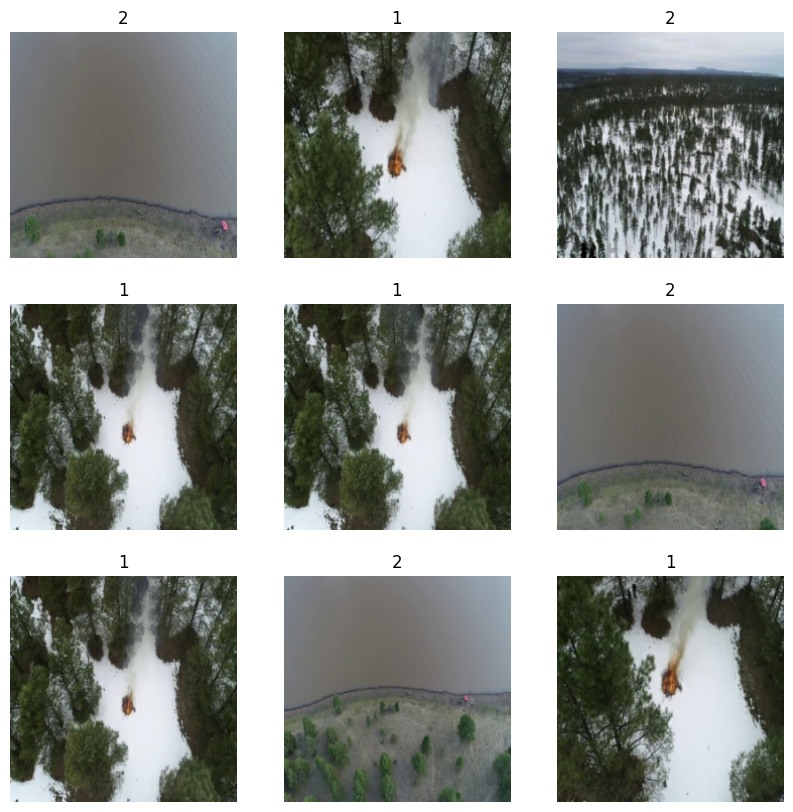

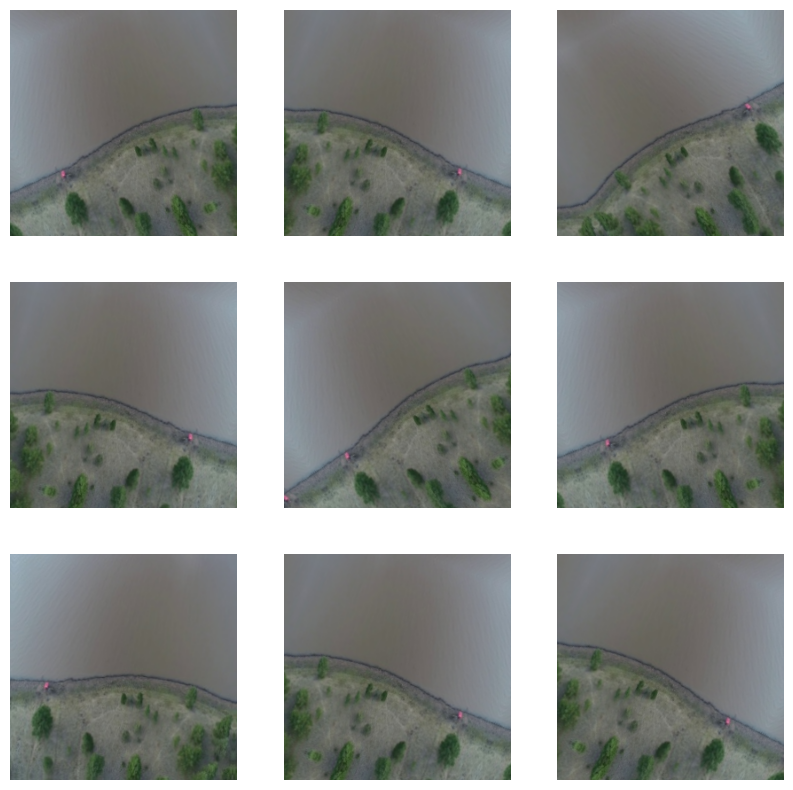

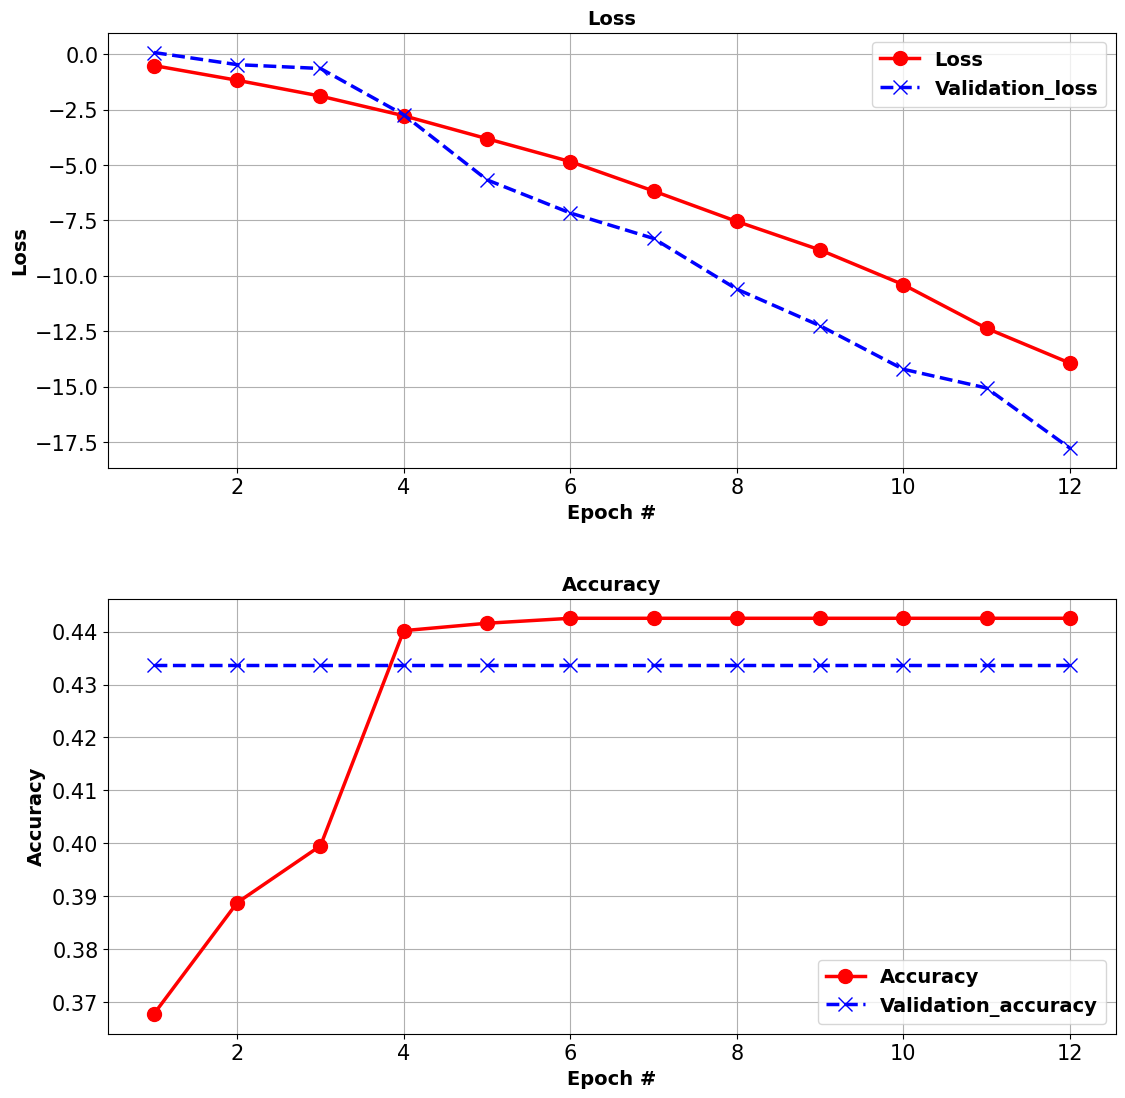

In [8]:
train_keras()

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import plot_confusion_matrix

batch_size = Config_classification.get('batch_size')
image_size = (new_size.get('width'), new_size.get('height'))
epochs = Config_classification.get('Epochs')


#########################################################
# Function definition

def classify():
    """
    This function load the trained model from the previous task and evaluates the performance of that over the test
    data set.
    :return: None, Plot the Confusion matrix for the test data on the binary classification
    """
    test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "frames/Test", seed=1337, image_size=image_size, batch_size=batch_size, shuffle=True
    )

    model_fire = load_model('Output/Models/model_fire_resnet_weighted_40_no_metric_simple')

    _ = model_fire.evaluate(test_ds, batch_size=batch_size)

    best_model_fire = load_model('Output/Models/model_fire_resnet_weighted_40_no_metric_simple/save_at_10.h5')
    results_eval = best_model_fire.evaluate(test_ds, batch_size=batch_size)

    for name, value in zip(model_fire.metrics_names, results_eval):
        print(name, ': ', value)
    print()

    cm = np.array([[results_eval[1],], [results_eval[0]]])
    cm_plot_labels = ['Fire', 'No Fire']
    #plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix',normalize=True)

    model_file = 'Output/Models/model_fire_resnet_weighted_40_no_metric_simple/save_at_%d.h5' % 3
    model_fire = load_model(model_file)
    test_fire_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "frames/confusion_test", seed=None,batch_size=32,
         image_size=(256, 256), shuffle=True)
    test_no_fire_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "frames/confusion_test", seed=None, batch_size=32,
         image_size=(256, 256), shuffle=True)
    fire_eval = model_fire.evaluate(test_fire_ds)
    no_fire_eval = model_fire.evaluate(test_no_fire_ds)
    true_fire = len(tf.io.gfile.listdir("frames/confusion_test/Fire_test"))
    true_no_fire = len(tf.io.gfile.listdir("frames/confusion_test/No_Fire_test"))
    tp = fire_eval[1] * true_fire
    fp = (1 - fire_eval[1]) * true_fire
    tn = (1 - no_fire_eval[1]) * true_no_fire
    fn = no_fire_eval[1] * true_no_fire
    cm = np.array([[tp, fn], [fp, tn]], dtype=int)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_plot_labels)
    disp.plot()
    
    
    
    prec = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('===========================')
    print(f"Precision :  {prec}")
    print(f"Recall  : {recall}")
    print(f"F1-Score  : {2*((recall*prec)/(recall+prec))}")
    print('===========================')
    
    

Found 2092 files belonging to 3 classes.
66/66 [==============================] - 3s 48ms/step - loss: -4.3791 - accuracy: 0.3308
loss :  -4.379051208496094
accuracy :  0.3307839334011078

Found 1618 files belonging to 3 classes.
Found 1618 files belonging to 3 classes.
51/51 [==============================] - 3s 49ms/step - loss: -0.2118 - accuracy: 0.5457
Precision :  0.5457354784011841
Recall  : 0.5457354758961681
F1-Score  : 0.5457354771486761


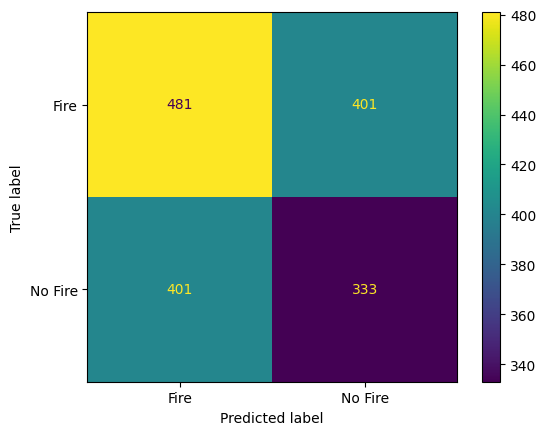

In [10]:
classify()